In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.linear_model import LinearRegression # Linear Regression

In [2]:
# Load data
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
df_train.shape

(188318, 132)

In [5]:
# Features
x = df_train.iloc[:, :-1]
x.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,A,B,A,B,A,A,A,A,B,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,2,A,B,A,A,A,A,A,A,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,5,A,B,A,A,B,A,A,A,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,10,B,B,A,B,A,A,A,A,B,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,11,A,B,A,B,A,A,A,A,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [6]:
# Targets
y = df_train.iloc[:, -1]

In [7]:
# Check if we have null values in training data
df_train.isnull().sum().sum()

0

In [8]:
cat_col = df_train.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 116


['cat1', 'cat2', 'cat3', 'cat4', 'cat5']

In [9]:
cont_col = df_train.select_dtypes(include = ['float64', 'int64', 'int32']).columns.tolist()
print('Number of numeric columns: {}'.format(len(cont_col)))
cont_col[:5]

Number of numeric columns: 16


['id', 'cont1', 'cont2', 'cont3', 'cont4']

### Find categorical features with N vaiable in training dataset

In [10]:
# We need to do the same thing for test dataset

In [11]:
# List of unique categories in each column
cat_list = []
for column in cat_col:
    cat_list.append(len(df_train[column].unique().tolist()))

In [12]:
from collections import Counter
Counter(cat_list)

Counter({2: 72,
         3: 4,
         4: 12,
         8: 3,
         7: 4,
         5: 3,
         16: 2,
         15: 1,
         19: 2,
         9: 1,
         13: 1,
         17: 2,
         20: 2,
         11: 1,
         84: 1,
         131: 1,
         51: 1,
         61: 1,
         23: 1,
         326: 1})

In [13]:
# Distinct categories in the training dataset
A = list(Counter(cat_list).keys())
A

[2, 3, 4, 8, 7, 5, 16, 15, 19, 9, 13, 17, 20, 11, 84, 131, 51, 61, 23, 326]

In [14]:
# Number of columns for a given number of category 
B = list(Counter(cat_list).values())
B

[72, 4, 12, 3, 4, 3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]

In [15]:
df_cat = pd.DataFrame([])
df_cat['No. Variables'] = A
df_cat['No. Columns'] = B
df_cat.sort_values(by = 'No. Variables', inplace = True)
df_cat

,No. Variables,No. Columns
0,2,72
1,3,4
2,4,12
5,5,3
4,7,4
3,8,3
9,9,1
13,11,1
10,13,1
7,15,1


<IPython.core.display.Javascript object>


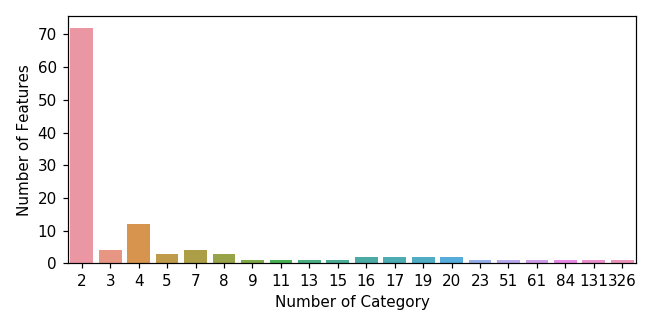

In [16]:
%matplotlib notebook
plt.figure(figsize=(6,3))
sns.barplot(A, B)
plt.xlabel('Number of Category')
plt.ylabel('Number of Features')
plt.tight_layout()

In [17]:
# We see that we have 70 columns with binary category

In [18]:
df_cat['No. Variables'][:6]

0    2
1    3
2    4
5    5
4    7
3    8
Name: No. Variables, dtype: int64

In [19]:
# Find categorical features with N vaiable in training dataset
def col_type_list(dataset, col_type_list):
    col_list = dataset.select_dtypes(include = col_type_list).columns
    #print(dataset.select_dtypes(include = col_type_list).shape)
    return col_list


def cat_uniq_list(dataset, label, N):
    
    column_obj = col_type_list(dataset, ['object', 'bool'])
    cat_uniq = dataset[column_obj].nunique()
    name = 'cat_{}_feat_'.format(N) + label
    uniq_list = cat_uniq[cat_uniq == N].index
    return{name: uniq_list}

dic = {}        
for i in [2, 3, 4, 5, 8]:       
    dic.update(cat_uniq_list(df_train, 'train', i))
    #dic.update(cat_uniq_list(df_test, 'test', i))
dic

{'cat_2_feat_train': Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
        'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
        'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
        'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
        'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
        'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
        'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
        'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72'],
       dtype='object'),
 'cat_3_feat_train': Index(['cat73', 'cat74', 'cat75', 'cat76'], dtype='object'),
 'cat_4_feat_train': Index(['cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
        'cat85', 'cat86', 'cat87', 'cat88'],
       dtype='obj

In [20]:
# Encode features with two variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_2 = LabelEncoder()

In [21]:
# Those columns with two variables
df_train[dic['cat_2_feat_train']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,A,B,A,B,A,A,A,A,B,A,...,A,A,A,A,A,A,A,A,A,A
1,A,B,A,A,A,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,A
2,A,B,A,A,B,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,A
3,B,B,A,B,A,A,A,A,B,A,...,A,A,A,A,A,A,A,A,A,A
4,A,B,A,B,A,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,B


# 2-Variable Categorical Features

In [22]:
#Atuencoding for 2-variable categorical features in training dataset
for i in dic['cat_2_feat_train']:
    df_train[i] = labelencoder_X_2.fit_transform(df_train[i])
df_train[dic['cat_2_feat_train']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Check if number of categorical features is reduced by 72 from 116:
cat_col_updated = df_train.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col_updated)))

Number of Categorical columns: 44


# N-Variable Categorical Features

In [24]:
# Define a function to encode  categorical features with more than 2 variables
def encode_features(cat_feature, N, dataset):
    n = len(cat_feature)
    x = dataset[cat_feature]
    k = 0
    col_name = []
    for i in range(n):
        columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [i + k])], remainder='passthrough') 
        x = np.array(columnTransformer.fit_transform(x), dtype = np.str)
        # Avoid dummy variable trap:
        x = x[:, 1:]
        k = (N - 2) * (i + 1)
        for j in range(1, N, 1):
            col_name.append(cat_feature[i] + '_' + str(N) + '_' + str(j))
        
    df = pd.DataFrame(x, columns = col_name, index = dataset.index)
    return df

In [25]:
# Autoencoder those columns with up to 8 variables
df3 = encode_features(dic['cat_{}_feat_train'.format(3)], 3, df_train)

In [26]:
df3.head()

,cat73_3_1,cat73_3_2,cat74_3_1,cat74_3_2,cat75_3_1,cat75_3_2,cat76_3_1,cat76_3_2
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Still columns are has object type
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   cat73_3_1  188318 non-null  object
 1   cat73_3_2  188318 non-null  object
 2   cat74_3_1  188318 non-null  object
 3   cat74_3_2  188318 non-null  object
 4   cat75_3_1  188318 non-null  object
 5   cat75_3_2  188318 non-null  object
 6   cat76_3_1  188318 non-null  object
 7   cat76_3_2  188318 non-null  object
dtypes: object(8)
memory usage: 11.5+ MB


In [28]:
df3_col = df3.columns.tolist()
df3_col

['cat73_3_1',
 'cat73_3_2',
 'cat74_3_1',
 'cat74_3_2',
 'cat75_3_1',
 'cat75_3_2',
 'cat76_3_1',
 'cat76_3_2']

In [29]:
# Now they are all float
for col in df3_col:
    df3[col] = df3[col].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cat73_3_1  188318 non-null  float64
 1   cat73_3_2  188318 non-null  float64
 2   cat74_3_1  188318 non-null  float64
 3   cat74_3_2  188318 non-null  float64
 4   cat75_3_1  188318 non-null  float64
 5   cat75_3_2  188318 non-null  float64
 6   cat76_3_1  188318 non-null  float64
 7   cat76_3_2  188318 non-null  float64
dtypes: float64(8)
memory usage: 11.5 MB


In [30]:
df4 = encode_features(dic['cat_{}_feat_train'.format(4)], 4, df_train)
df4_col = df4.columns.tolist()
for col in df4_col:
    df4[col] = df4[col].astype(float)

In [31]:
df5 = encode_features(dic['cat_{}_feat_train'.format(5)], 5, df_train)
df5_col = df5.columns.tolist()
for col in df5_col:
    df5[col] = df5[col].astype(float)

In [32]:
#df7 = encode_features(dic['cat_{}_feat_train'.format(7)], 7, df_train)
#df7_col = df7.columns.tolist()
#for col in df7_col:
#    df7[col] = df7[col].astype(float)

In [32]:
df8 = encode_features(dic['cat_{}_feat_train'.format(8)], 8, df_train)
df8_col = df8.columns.tolist()
for col in df8_col:
    df8[col] = df8[col].astype(float)

In [33]:
df_encoded_train =  pd.concat([df3, df4, df5, df8], axis=1)
df_encoded_train.head()

,cat73_3_1,cat73_3_2,cat74_3_1,cat74_3_2,cat75_3_1,cat75_3_2,cat76_3_1,cat76_3_2,cat77_4_1,cat77_4_2,...,cat91_8_5,cat91_8_6,cat91_8_7,cat96_8_1,cat96_8_2,cat96_8_3,cat96_8_4,cat96_8_5,cat96_8_6,cat96_8_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_train_final = pd.concat([df_train.select_dtypes(include = ['float64', 'int64', 'int32']), 
                            df_encoded_train], axis=1)

Now we have a training dataset with numeric variables

In [35]:
cat_col = df_train_final.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 0


[]

In [36]:
df_train_final.shape

(188318, 165)

### Numeric Variables

In [37]:
# Average for each feature to see if we need feature scaling or not.
df_train_final[cont_col].mean()

id        294135.982561
cont1          0.493861
cont2          0.507188
cont3          0.498918
cont4          0.491812
cont5          0.487428
cont6          0.490945
cont7          0.484970
cont8          0.486437
cont9          0.485506
cont10         0.498066
cont11         0.493511
cont12         0.493150
cont13         0.493138
cont14         0.495717
loss        3037.337686
dtype: float64

# Autoencoding for test set

In [38]:
# Load data
df_test = pd.read_csv('data/test.csv')

In [39]:
df_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [40]:
df_test.shape

(125546, 131)

In [41]:
# Check if we have null values in test data
df_test.isnull().sum().sum()

0

In [42]:
cat_col = df_test.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 116


['cat1', 'cat2', 'cat3', 'cat4', 'cat5']

In [43]:
cont_col = df_test.select_dtypes(include = ['float64', 'int64', 'int32']).columns.tolist()
print('Number of numeric columns: {}'.format(len(cont_col)))
cont_col[:5]

Number of numeric columns: 15


['id', 'cont1', 'cont2', 'cont3', 'cont4']

In [44]:
# List of unique categories in each column
cat_list = []
for column in cat_col:
    cat_list.append(len(df_test[column].unique().tolist()))

In [45]:
Counter(cat_list)

Counter({2: 72,
         3: 4,
         4: 12,
         8: 3,
         6: 1,
         5: 3,
         7: 3,
         9: 1,
         17: 3,
         15: 1,
         14: 1,
         18: 3,
         20: 1,
         11: 1,
         74: 1,
         123: 1,
         16: 1,
         51: 1,
         60: 1,
         23: 1,
         311: 1})

In [46]:
# Distinct categories in the training dataset
A = list(Counter(cat_list).keys())
# Number of columns for a given number of category 
B = list(Counter(cat_list).values())

In [47]:
df_cat_test = pd.DataFrame([])
df_cat_test['No. Variables test'] = A
df_cat_test['No. Columns test'] = B
df_cat_test.sort_values(by = 'No. Variables test', inplace = True)
df_cat_test

,No. Variables test,No. Columns test
0,2,72
1,3,4
2,4,12
5,5,3
4,6,1
6,7,3
3,8,3
7,9,1
13,11,1
10,14,1


In [48]:
# Compare with training set to see if they have the same number of variables:
df_cat_all =  pd.concat([df_cat, df_cat_test], axis=1)
df_cat_all.sort_values(by = 'No. Variables', inplace = True)
df_cat_all

,No. Variables,No. Columns,No. Variables test,No. Columns test
0,2.0,72.0,2,72
1,3.0,4.0,3,4
2,4.0,12.0,4,12
5,5.0,3.0,5,3
4,7.0,4.0,6,1
3,8.0,3.0,8,3
9,9.0,1.0,15,1
13,11.0,1.0,11,1
10,13.0,1.0,14,1
7,15.0,1.0,9,1


<IPython.core.display.Javascript object>


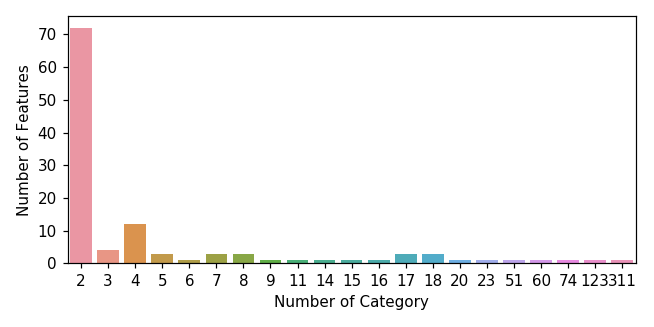

In [49]:
%matplotlib notebook
plt.figure(figsize=(6,3))
sns.barplot(A, B)
plt.xlabel('Number of Category')
plt.ylabel('Number of Features')
plt.tight_layout()

Note that in training dataset we had not a column with 6 categorical variables
So we should ignore the column with 6 variables and just keep columns with 
2, 3, 4, 5, 7, and 8 variables
On the other hand we don't have a column with 7 variables in test dataset
So we keep only those columns with 2, 3, 4, 5 and 8 variables

In [50]:
dic = {}        
for i in [2, 3, 4, 5, 8]:       
    dic.update(cat_uniq_list(df_test, 'test', i))
dic

{'cat_2_feat_test': Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
        'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
        'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
        'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
        'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
        'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
        'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
        'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72'],
       dtype='object'),
 'cat_3_feat_test': Index(['cat73', 'cat74', 'cat75', 'cat76'], dtype='object'),
 'cat_4_feat_test': Index(['cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
        'cat85', 'cat86', 'cat87', 'cat88'],
       dtype='object

In [51]:
#Atuencoding for 2-variable categorical features in training dataset
for i in dic['cat_2_feat_test']:
    df_test[i] = labelencoder_X_2.fit_transform(df_test[i])
df_test[dic['cat_2_feat_test']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Check if number of categorical features is reduced by 72 from 116:
cat_col_updated = df_test.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col_updated)))

Number of Categorical columns: 44


In [53]:
df3 = encode_features(dic['cat_{}_feat_test'.format(3)], 3, df_test)
df3_col = df3.columns.tolist()
for col in df3_col:
    df3[col] = df3[col].astype(float)
    
df4 = encode_features(dic['cat_{}_feat_test'.format(4)], 4, df_test)
df4_col = df4.columns.tolist()
for col in df4_col:
    df4[col] = df4[col].astype(float)
    
df5 = encode_features(dic['cat_{}_feat_test'.format(5)], 5, df_test)
df5_col = df5.columns.tolist()
for col in df5_col:
    df5[col] = df5[col].astype(float)
    
#df7 = encode_features(dic['cat_{}_feat_test'.format(7)], 7, df_test)
#df7_col = df7.columns.tolist()
#for col in df7_col:
#    df7[col] = df7[col].astype(float)
    
df8 = encode_features(dic['cat_{}_feat_test'.format(8)], 8, df_test)
df8_col = df8.columns.tolist()
for col in df8_col:
    df8[col] = df8[col].astype(float)

In [55]:
df_encoded_test =  pd.concat([df3, df4, df5, df8], axis=1)
df_encoded_test.head()

,cat73_3_1,cat73_3_2,cat74_3_1,cat74_3_2,cat75_3_1,cat75_3_2,cat76_3_1,cat76_3_2,cat77_4_1,cat77_4_2,...,cat91_8_5,cat91_8_6,cat91_8_7,cat92_8_1,cat92_8_2,cat92_8_3,cat92_8_4,cat92_8_5,cat92_8_6,cat92_8_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_test_final = pd.concat([df_test.select_dtypes(include = ['float64', 'int64', 'int32']), 
                            df_encoded_test], axis=1)

In [57]:
cat_col = df_test_final.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 0


[]

In [58]:
df_test_final.shape

(125546, 164)

In [59]:
df_train_final.shape

(188318, 165)

### Features and target of training set

In [69]:
x = df_train_final.drop(columns = ['id', 'loss'])
x.shape

(188318, 163)

In [70]:
y = df_train_final['loss']

### Principle Component Analysis

In [72]:
model_pca = PCA()

In [73]:
model_pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
# Look at first 5 principal components
model_pca.components_[:, :5]

array([[-5.53455642e-02,  1.60052083e-01,  2.60250279e-02,
         3.30253201e-02, -4.49491472e-03],
       [-1.29990541e-01,  3.42745289e-01,  6.67303838e-02,
         5.75849069e-02,  4.20533453e-02],
       [-9.00931686e-02, -3.38061544e-01,  5.30898875e-02,
         1.86163589e-01, -5.19786137e-02],
       [ 9.68750444e-03, -1.17040543e-01,  4.72286468e-03,
        -4.01818957e-01,  5.83130355e-01],
       [ 5.59853329e-02, -8.23171673e-02, -4.36243422e-02,
         2.95609477e-01,  2.02558156e-02],
       [-8.25741147e-02,  1.64134245e-01,  5.00850669e-02,
        -3.08609551e-01, -1.52346407e-01],
       [ 2.18665855e-02,  1.79406946e-02,  2.53616290e-02,
        -4.47951564e-02, -8.09052631e-02],
       [ 1.20163149e-01, -2.22608214e-02, -1.89630268e-02,
        -1.18533088e-01, -9.27469508e-02],
       [-1.42536871e-01,  2.96815765e-02, -5.84394096e-02,
         7.39401612e-02,  1.37368183e-01],
       [ 1.53797818e-02,  8.95532203e-03,  1.70989295e-02,
        -5.60467475e-02

In [80]:
# proportion of variance explained 
# by each of the four principal components in the USArrests data
proportion = model_pca.explained_variance_ratio_
proportion

array([1.20895621e-01, 1.01796414e-01, 5.60854031e-02, 5.26840716e-02,
       4.39893490e-02, 4.21819333e-02, 3.19585982e-02, 3.11164490e-02,
       2.97437937e-02, 2.56294363e-02, 2.29250399e-02, 2.24001987e-02,
       2.08872726e-02, 1.91493502e-02, 1.80109094e-02, 1.66891817e-02,
       1.51819524e-02, 1.50621011e-02, 1.39289632e-02, 1.31500066e-02,
       1.28852195e-02, 1.13114069e-02, 1.10931088e-02, 1.07488742e-02,
       1.06062884e-02, 9.48279445e-03, 9.18862135e-03, 8.44900129e-03,
       8.29690029e-03, 7.48412568e-03, 7.10653994e-03, 6.72003648e-03,
       6.43767792e-03, 6.15122971e-03, 5.99337252e-03, 5.92026152e-03,
       5.63596306e-03, 5.42122991e-03, 5.26612363e-03, 5.21275019e-03,
       4.98801758e-03, 4.53777780e-03, 4.51911870e-03, 4.41521861e-03,
       4.26182415e-03, 4.08351742e-03, 3.98252123e-03, 3.87848674e-03,
       3.81200912e-03, 3.65635036e-03, 3.41763437e-03, 3.33395324e-03,
       3.26517680e-03, 3.18353169e-03, 3.17817784e-03, 2.84358871e-03,
      

<IPython.core.display.Javascript object>


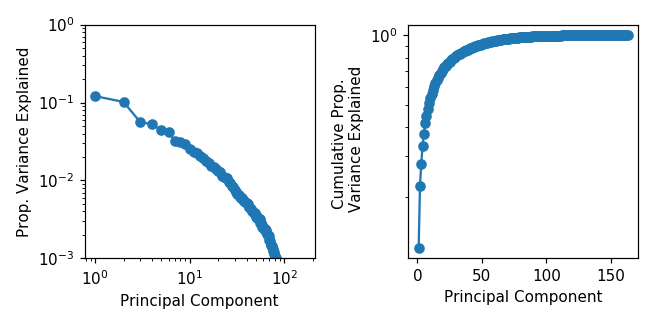

In [92]:
%matplotlib notebook
fig, axe = plt.subplots(1, 2, figsize = (6, 3))
axe[0].plot(range(1, x.shape[1]+1), proportion, marker = 'o')
axe[0].set_ylabel('Prop. Variance Explained')
axe[0].set_xlabel('Principal Component')
axe[0].set_ylim(0.001, 1)
axe[0].semilogx()
axe[0].semilogy()

cumul_prop = [sum(proportion[:i+1]) for i in range(len(proportion))]
axe[1].plot(range(1, x.shape[1]+1), cumul_prop, marker = 'o')
axe[1].set_ylabel('Cumulative Prop. \n Variance Explained')
axe[1].set_xlabel('Principal Component')
axe[1].semilogy()


plt.tight_layout()

In [79]:
LR = LinearRegression()